In [59]:
import os
import sys
sys.path.insert(0, os.path.abspath('../complete_run'))

In [89]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [61]:
from classifier.models import conv_net
from classifier.analysis import MotifMatch

from utils.seq import one_hot_to_seq

In [62]:
model = conv_net(filters=(96, 16), pool_size=5, fully_connected=100, drop=0.6)
model.load_state_dict(torch.load('../models/classifier/classifier.pth', map_location='cpu'))

<All keys matched successfully>

In [63]:
filters = model.state_dict()['net.0.weight'].numpy()

In [96]:
filter_seqs = []
for i, f in enumerate(filters.transpose(0, 2, 1)):
    filter_seqs.append(SeqRecord(one_hot_to_seq(f), id=str(i)))

In [97]:
with open('../memes/filter_seqs.fasta', 'w') as f:
    SeqIO.write(filter_seqs, f, 'fasta')

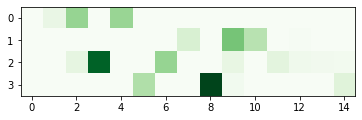

In [104]:
N = 7
plt.imshow(filters[N], cmap='Greens', vmin=0)

In [98]:
pwm = np.loadtxt('../memes/embryonic/V_OCT4_01.txt').transpose()[(0, 3, 1, 2), :]
motif_match = MotifMatch(pwm)
filter_matches = motif_match.scan(filters)

In [99]:
top = filter_matches[:, 0].argsort()[::-1][:5]

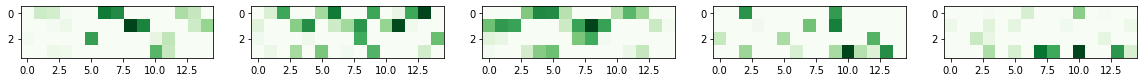

In [100]:
%matplotlib inline
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, am in enumerate(top):
    ax[i].imshow(filters[am], cmap='Greens', vmin=0)


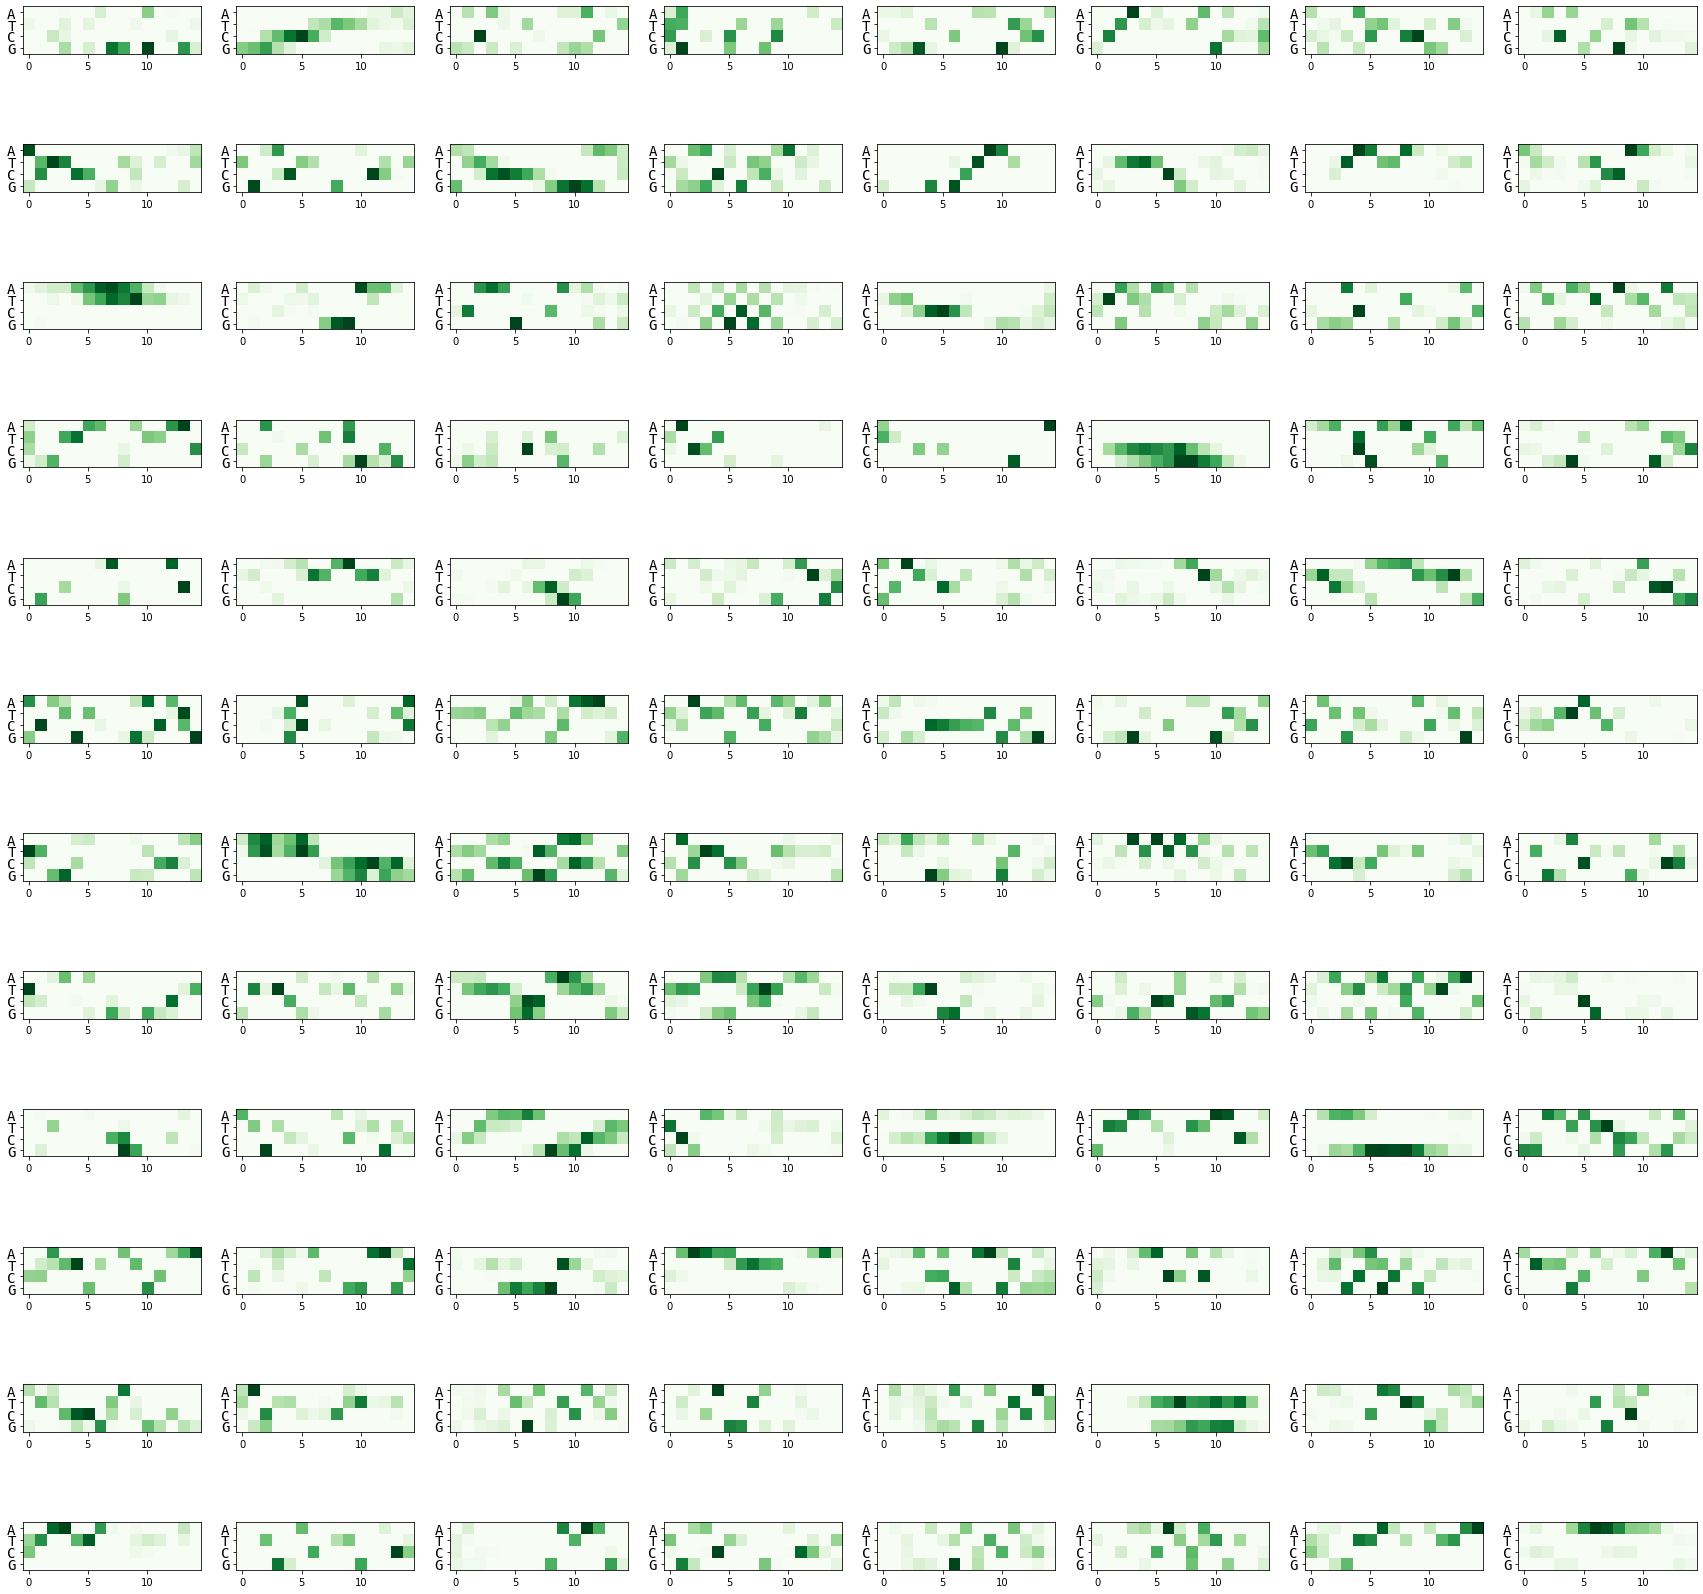

In [58]:
fig, ax = plt.subplots(12, 8, figsize=(30, 30))
for i in range(96):
    seq = model.state_dict()['net.0.weight'][i].squeeze().numpy()
    ax[i//8][i%8].imshow(seq, cmap='Greens', vmin=0)
    ax[i//8][i%8].set_yticks([0, 1, 2, 3])
    ax[i//8][i%8].set_yticklabels(['A', 'T', 'C', 'G'], fontsize=14, fontfamily='monospace')
plt.savefig('../figures/classifier/filter_grid_PB20200602.png')